In [1]:
import gzip, time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import seaborn as sns
from Bio.Seq import Seq
from collections import Counter
import os
import cassiopeia as cas
from cassiopeia.mixins import logger
from typing import Dict, List, Tuple
from cassiopeia.preprocess import (
    alignment_utilities,
    constants,
    map_utils,
    doublet_utils,
    lineage_utils,
    UMI_utils,
    utilities,
)

## load cell-intBC-umi table,couple scRNA cell,remove umis with low UMIs

### 3026

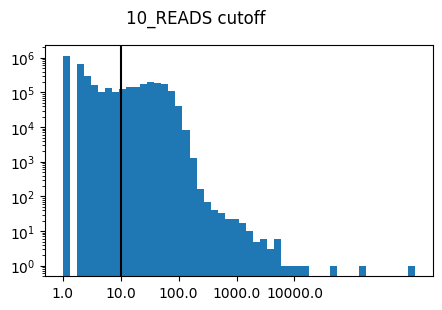

In [2]:
umi_table_T1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1/a3026/cassiopeia_result/staticBC/umi_table_filtered.csv',
                               sep=',',index_col=0,header=0,keep_default_na=False)

plt.figure(figsize=(5,3))
plt.hist(np.log(umi_table_T1['readCount'])/np.log(10), bins=50)
plt.axvline(np.log(10)/np.log(10),c='k')
plt.xticks(range(5),np.logspace(0,4,5))
plt.text(np.log(10)/np.log(10)*1.1,10**7,'10_READS cutoff', fontsize=12)
plt.yscale('log')

umi_table_T1 = umi_table_T1[umi_table_T1['readCount'] >= 10]

filtered_cell_barcodes_T1_a3026 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T1_a3026.csv',header=0)
filtered_cell_barcodes_T1_a3026 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T1_a3026['cellBC'] ]

umi_table_T1 = umi_table_T1[umi_table_T1['cellBC'].isin(filtered_cell_barcodes_T1_a3026)]
umi_table_T1['Sample'] = 'T1_a3026'
umi_table_T1['cellBC'] = umi_table_T1['Sample'] + '_' + umi_table_T1['cellBC']

/tmp/ipykernel_136603/1324874541.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T2_a3026_1['Sample'] = 'T2_a3026_1'
/tmp/ipykernel_136603/1324874541.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T2_a3026_1['cellBC'] = umi_table_T2_a3026_1['Sample'] + '_' + umi_table_T2_a3026_1['cellBC']
/tmp/ipykernel_136603/1324874541.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

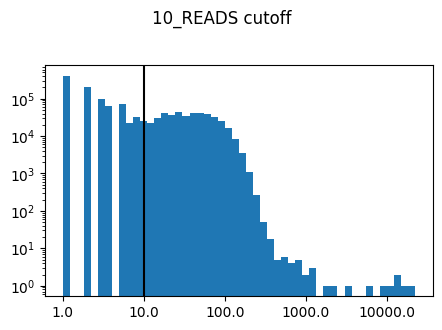

In [3]:
umi_table_T2 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T2/a3026/cassiopeia_result/staticBC/umi_table_filtered.csv',
                               sep=',',index_col=0,header=0,keep_default_na=False)

plt.figure(figsize=(5,3))
plt.hist(np.log(umi_table_T2['readCount'])/np.log(10), bins=50)
plt.axvline(np.log(10)/np.log(10),c='k')
plt.xticks(range(5),np.logspace(0,4,5))
plt.text(np.log(10)/np.log(10)*1.1,10**7,'10_READS cutoff', fontsize=12)
plt.yscale('log')

umi_table_T2 = umi_table_T2[umi_table_T2['readCount'] >= 15]

filtered_cell_barcodes_T2_a3026_1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T2_a3026_1.csv',header=0)
filtered_cell_barcodes_T2_a3026_1 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T2_a3026_1['cellBC'] ]

umi_table_T2_a3026_1 = umi_table_T2[umi_table_T2['cellBC'].isin(filtered_cell_barcodes_T2_a3026_1)]
umi_table_T2_a3026_1['Sample'] = 'T2_a3026_1'
umi_table_T2_a3026_1['cellBC'] = umi_table_T2_a3026_1['Sample'] + '_' + umi_table_T2_a3026_1['cellBC']

filtered_cell_barcodes_T2_a3026_2 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T2_a3026_2.csv',header=0)
filtered_cell_barcodes_T2_a3026_2 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T2_a3026_2['cellBC'] ]

umi_table_T2_a3026_2 = umi_table_T2[umi_table_T2['cellBC'].isin(filtered_cell_barcodes_T2_a3026_2)]
umi_table_T2_a3026_2['Sample'] = 'T2_a3026_2'
umi_table_T2_a3026_2['cellBC'] = umi_table_T2_a3026_2['Sample'] + '_' + umi_table_T2_a3026_2['cellBC']


/tmp/ipykernel_136603/1370834196.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T3_a3026_1_1['Sample'] = 'T3_a3026_1_1'
/tmp/ipykernel_136603/1370834196.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T3_a3026_1_1['cellBC'] = umi_table_T3_a3026_1_1['Sample'] + '_' + umi_table_T3_a3026_1_1['cellBC']
/tmp/ipykernel_136603/1370834196.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

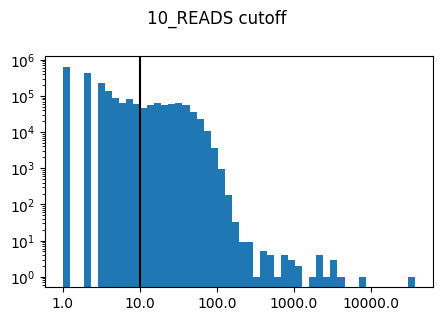

In [4]:
umi_table_T3 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T3/a3026/cassiopeia_result/staticBC/umi_table_filtered.csv',
                               sep=',',index_col=0,header=0,keep_default_na=False)

plt.figure(figsize=(5,3))
plt.hist(np.log(umi_table_T3['readCount'])/np.log(10), bins=50)
plt.axvline(np.log(10)/np.log(10),c='k')
plt.xticks(range(5),np.logspace(0,4,5))
plt.text(np.log(10)/np.log(10)*1.1,10**7,'10_READS cutoff', fontsize=12)
plt.yscale('log')

umi_table_T3 = umi_table_T3[umi_table_T3['readCount'] >= 10]

filtered_cell_barcodes_T3_a3026_1_1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T3_a3026_1_1.csv',header=0)
filtered_cell_barcodes_T3_a3026_1_1 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T3_a3026_1_1['cellBC'] ]
umi_table_T3_a3026_1_1 = umi_table_T3[umi_table_T3['cellBC'].isin(filtered_cell_barcodes_T3_a3026_1_1)]
umi_table_T3_a3026_1_1['Sample'] = 'T3_a3026_1_1'
umi_table_T3_a3026_1_1['cellBC'] = umi_table_T3_a3026_1_1['Sample'] + '_' + umi_table_T3_a3026_1_1['cellBC']

filtered_cell_barcodes_T3_a3026_2_1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T3_a3026_2_1.csv',header=0)
filtered_cell_barcodes_T3_a3026_2_1 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T3_a3026_2_1['cellBC'] ]
umi_table_T3_a3026_2_1 = umi_table_T3[umi_table_T3['cellBC'].isin(filtered_cell_barcodes_T3_a3026_2_1)]
umi_table_T3_a3026_2_1['Sample'] = 'T3_a3026_2_1'
umi_table_T3_a3026_2_1['cellBC'] = umi_table_T3_a3026_2_1['Sample'] + '_' + umi_table_T3_a3026_2_1['cellBC']


In [5]:
umi_table_3026 = pd.concat([umi_table_T1, 
                       umi_table_T2_a3026_1,umi_table_T2_a3026_2,
                       umi_table_T3_a3026_1_1,umi_table_T3_a3026_2_1], ignore_index=True)

### 3028

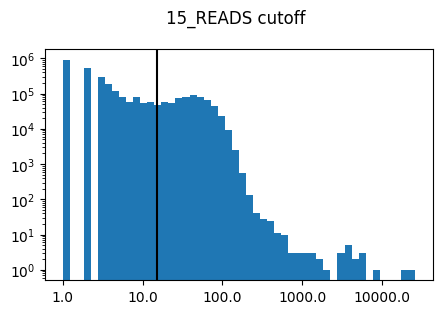

In [6]:
umi_table_T1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1/a3028/cassiopeia_result/staticBC/umi_table_filtered.csv',
                               sep=',',index_col=0,header=0,keep_default_na=False)

plt.figure(figsize=(5,3))
plt.hist(np.log(umi_table_T1['readCount'])/np.log(10), bins=50)
plt.axvline(np.log(15)/np.log(10),c='k')
plt.xticks(range(5),np.logspace(0,4,5))
plt.text(np.log(15)/np.log(10)*1.1,10**7,'15_READS cutoff', fontsize=12)
plt.yscale('log')

umi_table_T1 = umi_table_T1[umi_table_T1['readCount'] >= 10]

filtered_cell_barcodes_T1_a3028 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T1_a3028.csv',header=0)
filtered_cell_barcodes_T1_a3028 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T1_a3028['cellBC'] ]

umi_table_T1 = umi_table_T1[umi_table_T1['cellBC'].isin(filtered_cell_barcodes_T1_a3028)]
umi_table_T1['Sample'] = 'T1_a3028'
umi_table_T1['cellBC'] = umi_table_T1['Sample'] + '_' + umi_table_T1['cellBC']

/tmp/ipykernel_136603/2000971174.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T2_a3028_1['Sample'] = 'T2_a3028_1'
/tmp/ipykernel_136603/2000971174.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T2_a3028_1['cellBC'] = umi_table_T2_a3028_1['Sample'] + '_' + umi_table_T2_a3028_1['cellBC']
/tmp/ipykernel_136603/2000971174.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

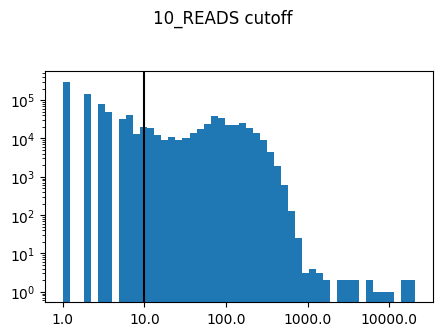

In [7]:
umi_table_T2 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T2/a3028/cassiopeia_result/staticBC/umi_table_filtered.csv',
                               sep=',',index_col=0,header=0,keep_default_na=False)

plt.figure(figsize=(5,3))
plt.hist(np.log(umi_table_T2['readCount'])/np.log(10), bins=50)
plt.axvline(np.log(10)/np.log(10),c='k')
plt.xticks(range(5),np.logspace(0,4,5))
plt.text(np.log(10)/np.log(10)*1.1,10**7,'10_READS cutoff', fontsize=12)
plt.yscale('log')

umi_table_T2 = umi_table_T2[umi_table_T2['readCount'] >= 15]

filtered_cell_barcodes_T2_a3028_1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T2_a3028_1.csv',header=0)
filtered_cell_barcodes_T2_a3028_1 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T2_a3028_1['cellBC'] ]

umi_table_T2_a3028_1 = umi_table_T2[umi_table_T2['cellBC'].isin(filtered_cell_barcodes_T2_a3028_1)]
umi_table_T2_a3028_1['Sample'] = 'T2_a3028_1'
umi_table_T2_a3028_1['cellBC'] = umi_table_T2_a3028_1['Sample'] + '_' + umi_table_T2_a3028_1['cellBC']

filtered_cell_barcodes_T2_a3028_2 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T2_a3028_2.csv',header=0)
filtered_cell_barcodes_T2_a3028_2 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T2_a3028_2['cellBC'] ]

umi_table_T2_a3028_2 = umi_table_T2[umi_table_T2['cellBC'].isin(filtered_cell_barcodes_T2_a3028_2)]
umi_table_T2_a3028_2['Sample'] = 'T2_a3028_2'
umi_table_T2_a3028_2['cellBC'] = umi_table_T2_a3028_2['Sample'] + '_' + umi_table_T2_a3028_2['cellBC']


/tmp/ipykernel_136603/488638205.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T3_a3028_1_1['Sample'] = 'T3_a3028_1_1'
/tmp/ipykernel_136603/488638205.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T3_a3028_1_1['cellBC'] = umi_table_T3_a3028_1_1['Sample'] + '_' + umi_table_T3_a3028_1_1['cellBC']
/tmp/ipykernel_136603/488638205.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

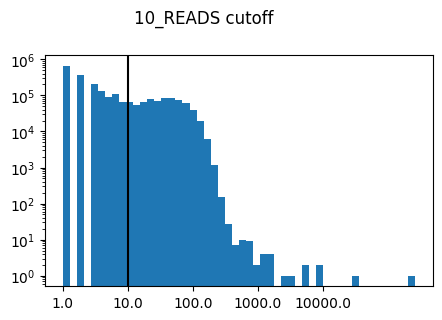

In [8]:
umi_table_T3 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T3/a3028/cassiopeia_result/staticBC/umi_table_filtered.csv',
                               sep=',',index_col=0,header=0,keep_default_na=False)

plt.figure(figsize=(5,3))
plt.hist(np.log(umi_table_T3['readCount'])/np.log(10), bins=50)
plt.axvline(np.log(10)/np.log(10),c='k')
plt.xticks(range(5),np.logspace(0,4,5))
plt.text(np.log(10)/np.log(10)*1.1,10**7,'10_READS cutoff', fontsize=12)
plt.yscale('log')

umi_table_T3 = umi_table_T3[umi_table_T3['readCount'] >= 10]

filtered_cell_barcodes_T3_a3028_1_1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T3_a3028_1_1.csv',header=0)
filtered_cell_barcodes_T3_a3028_1_1 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T3_a3028_1_1['cellBC'] ]
umi_table_T3_a3028_1_1 = umi_table_T3[umi_table_T3['cellBC'].isin(filtered_cell_barcodes_T3_a3028_1_1)]
umi_table_T3_a3028_1_1['Sample'] = 'T3_a3028_1_1'
umi_table_T3_a3028_1_1['cellBC'] = umi_table_T3_a3028_1_1['Sample'] + '_' + umi_table_T3_a3028_1_1['cellBC']

filtered_cell_barcodes_T3_a3028_2_1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T3_a3028_2_1.csv',header=0)
filtered_cell_barcodes_T3_a3028_2_1 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T3_a3028_2_1['cellBC'] ]
umi_table_T3_a3028_2_1 = umi_table_T3[umi_table_T3['cellBC'].isin(filtered_cell_barcodes_T3_a3028_2_1)]
umi_table_T3_a3028_2_1['Sample'] = 'T3_a3028_2_1'
umi_table_T3_a3028_2_1['cellBC'] = umi_table_T3_a3028_2_1['Sample'] + '_' + umi_table_T3_a3028_2_1['cellBC']


In [9]:
umi_table_3028 = pd.concat([umi_table_T1, 
                       umi_table_T2_a3028_1,umi_table_T2_a3028_2,
                       umi_table_T3_a3028_1_1,umi_table_T3_a3028_2_1], ignore_index=True)

### 3030

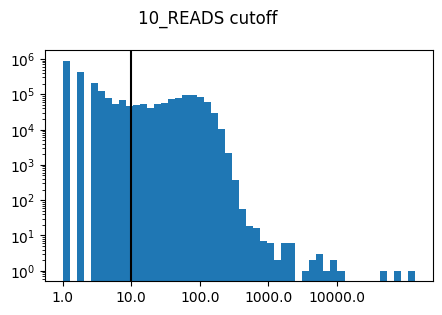

In [10]:
umi_table_T1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1/a3030/cassiopeia_result/staticBC/umi_table_filtered.csv',
                               sep=',',index_col=0,header=0,keep_default_na=False)

plt.figure(figsize=(5,3))
plt.hist(np.log(umi_table_T1['readCount'])/np.log(10), bins=50)
plt.axvline(np.log(10)/np.log(10),c='k')
plt.xticks(range(5),np.logspace(0,4,5))
plt.text(np.log(10)/np.log(10)*1.1,10**7,'10_READS cutoff', fontsize=12)
plt.yscale('log')

umi_table_T1 = umi_table_T1[umi_table_T1['readCount'] >= 10]

filtered_cell_barcodes_T1_a3030 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T1_a3030.csv',header=0)
filtered_cell_barcodes_T1_a3030 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T1_a3030['cellBC'] ]

umi_table_T1 = umi_table_T1[umi_table_T1['cellBC'].isin(filtered_cell_barcodes_T1_a3030)]
umi_table_T1['Sample'] = 'T1_a3030'
umi_table_T1['cellBC'] = umi_table_T1['Sample'] + '_' + umi_table_T1['cellBC']

/tmp/ipykernel_136603/947061958.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T2_a3030_1['Sample'] = 'T2_a3030_1'
/tmp/ipykernel_136603/947061958.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T2_a3030_1['cellBC'] = umi_table_T2_a3030_1['Sample'] + '_' + umi_table_T2_a3030_1['cellBC']
/tmp/ipykernel_136603/947061958.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

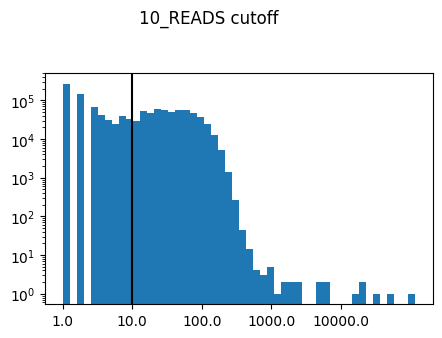

In [11]:
umi_table_T2 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T2/a3030/cassiopeia_result/staticBC/umi_table_filtered.csv',
                               sep=',',index_col=0,header=0,keep_default_na=False)

plt.figure(figsize=(5,3))
plt.hist(np.log(umi_table_T2['readCount'])/np.log(10), bins=50)
plt.axvline(np.log(10)/np.log(10),c='k')
plt.xticks(range(5),np.logspace(0,4,5))
plt.text(np.log(10)/np.log(10)*1.1,10**7,'10_READS cutoff', fontsize=12)
plt.yscale('log')

umi_table_T2 = umi_table_T2[umi_table_T2['readCount'] >= 30]

filtered_cell_barcodes_T2_a3030_1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T2_a3030_1.csv',header=0)
filtered_cell_barcodes_T2_a3030_1 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T2_a3030_1['cellBC'] ]

umi_table_T2_a3030_1 = umi_table_T2[umi_table_T2['cellBC'].isin(filtered_cell_barcodes_T2_a3030_1)]
umi_table_T2_a3030_1['Sample'] = 'T2_a3030_1'
umi_table_T2_a3030_1['cellBC'] = umi_table_T2_a3030_1['Sample'] + '_' + umi_table_T2_a3030_1['cellBC']

filtered_cell_barcodes_T2_a3030_2 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T2_a3030_2.csv',header=0)
filtered_cell_barcodes_T2_a3030_2 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T2_a3030_2['cellBC'] ]

umi_table_T2_a3030_2 = umi_table_T2[umi_table_T2['cellBC'].isin(filtered_cell_barcodes_T2_a3030_2)]
umi_table_T2_a3030_2['Sample'] = 'T2_a3030_2'
umi_table_T2_a3030_2['cellBC'] = umi_table_T2_a3030_2['Sample'] + '_' + umi_table_T2_a3030_2['cellBC']


/tmp/ipykernel_136603/896730182.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T3_a3030_1_1['Sample'] = 'T3_a3030_1_1'
/tmp/ipykernel_136603/896730182.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  umi_table_T3_a3030_1_1['cellBC'] = umi_table_T3_a3030_1_1['Sample'] + '_' + umi_table_T3_a3030_1_1['cellBC']
/tmp/ipykernel_136603/896730182.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

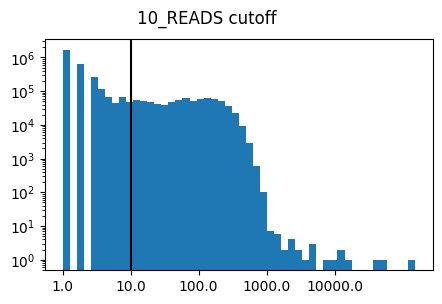

In [12]:
umi_table_T3 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T3/a3030/cassiopeia_result/staticBC/umi_table_filtered.csv',
                               sep=',',index_col=0,header=0,keep_default_na=False)

plt.figure(figsize=(5,3))
plt.hist(np.log(umi_table_T3['readCount'])/np.log(10), bins=50)
plt.axvline(np.log(10)/np.log(10),c='k')
plt.xticks(range(5),np.logspace(0,4,5))
plt.text(np.log(10)/np.log(10)*1.1,10**7,'10_READS cutoff', fontsize=12)
plt.yscale('log')

umi_table_T3 = umi_table_T3[umi_table_T3['readCount'] >= 50]

filtered_cell_barcodes_T3_a3030_1_1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T3_a3030_1_1.csv',header=0)
filtered_cell_barcodes_T3_a3030_1_1 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T3_a3030_1_1['cellBC'] ]
umi_table_T3_a3030_1_1 = umi_table_T3[umi_table_T3['cellBC'].isin(filtered_cell_barcodes_T3_a3030_1_1)]
umi_table_T3_a3030_1_1['Sample'] = 'T3_a3030_1_1'
umi_table_T3_a3030_1_1['cellBC'] = umi_table_T3_a3030_1_1['Sample'] + '_' + umi_table_T3_a3030_1_1['cellBC']

filtered_cell_barcodes_T3_a3030_2_1 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/sample_cell/T3_a3030_2_1.csv',header=0)
filtered_cell_barcodes_T3_a3030_2_1 = [ cellBC.replace('-1','') for cellBC in filtered_cell_barcodes_T3_a3030_2_1['cellBC'] ]
umi_table_T3_a3030_2_1 = umi_table_T3[umi_table_T3['cellBC'].isin(filtered_cell_barcodes_T3_a3030_2_1)]
umi_table_T3_a3030_2_1['Sample'] = 'T3_a3030_2_1'
umi_table_T3_a3030_2_1['cellBC'] = umi_table_T3_a3030_2_1['Sample'] + '_' + umi_table_T3_a3030_2_1['cellBC']


In [13]:
umi_table_3030 = pd.concat([umi_table_T1, 
                       umi_table_T2_a3030_1,umi_table_T2_a3030_2,
                       umi_table_T3_a3030_1_1,umi_table_T3_a3030_2_1], ignore_index=True)

## merge

In [14]:
umi_table = pd.concat([umi_table_3026,umi_table_3028,umi_table_3030], ignore_index=True)

In [15]:
umi_table.index = range(0,umi_table.shape[0])

In [16]:
umi_table

,readName,UMI,cellBC,grpFlag,intBC,qual,readCount,seq,Sample
0,AAACCCAAGACTAGAT_GTCAAGTGTACG_94,GTCAAGTGTACG,T1_a3026_AAACCCAAGACTAGAT,0+,staticBC,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,94,ACGATCATCTGACAGTCACTGTGACGCACTTTTTCCGAACGCGCAA...,T1_a3026
1,AAACCCAAGACTAGAT_TTGCATAGCGTA_89,TTGCATAGCGTA,T1_a3026_AAACCCAAGACTAGAT,0+,staticBC,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,89,ACGATCATCTGACAGTCACTGTGACGCACTTTTTCCGAACGCGCAA...,T1_a3026
2,AAACCCAAGACTAGAT_CTTCCAATATGC_84,CTTCCAATATGC,T1_a3026_AAACCCAAGACTAGAT,0+,staticBC,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,84,ACGATCATCTGACAGTCACTGTGACGCACTTTTTGAGCCGCATACC...,T1_a3026
3,AAACCCAAGACTAGAT_TCCCCGTAAAGA_76,TCCCCGTAAAGA,T1_a3026_AAACCCAAGACTAGAT,0+,staticBC,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,76,ATCCAGCATGGACTGAATCTGCTTGTTGATCAGTGTTGAAAGTGCA...,T1_a3026
4,AAACCCAAGACTAGAT_CCGAATACTCCG_75,CCGAATACTCCG,T1_a3026_AAACCCAAGACTAGAT,0+,staticBC,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,75,ACGATCATCTGACAGTCACTGTGACGCACTTTTTGAGCCGCATACC...,T1_a3026
...,...,...,...,...,...,...,...,...,...
4390950,TTTGTTGTCGGTATGT_TTGTTTTGCAGT_54,TTGTTTTGCAGT,T3_a3030_2_1_TTTGTTGTCGGTATGT,0+,staticBC,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,54,ACGATCATCTGACAGTCACTGTGACGCACTTTTTGGCCCGGTGCAG...,T3_a3030_2_1
4390951,TTTGTTGTCGGTATGT_GCCTGTGCGGGC_53,GCCTGTGCGGGC,T3_a3030_2_1_TTTGTTGTCGGTATGT,0+,staticBC,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,53,ACGATCATCTGACAGTCACTGTGACGCACTTTTTCCAAATCGGACG...,T3_a3030_2_1
4390952,TTTGTTGTCGGTATGT_GCTATTAAGATC_55,GCTATTAAGATC,T3_a3030_2_1_TTTGTTGTCGGTATGT,0+,staticBC,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,55,ACGATCATCTGACAGTCACTGTGACGCACTTTTTCCAAATCGGACG...,T3_a3030_2_1
4390953,TTTGTTGTCGGTATGT_CAACGCAAGGCT_52,CAACGCAAGGCT,T3_a3030_2_1_TTTGTTGTCGGTATGT,0,staticBC,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,52,ACGATCATCTGACAGTCACTGTGACGCACTTTTTCGGGAAAGGTAC...,T3_a3030_2_1


## call static barcode

In [17]:
def is_valid(bc):
    return (bc[0:8]=='CACTTTTT' and bc[22:27]=='AAAAG') or (bc[0:28]=='CACTTTTTTCTAGATGAGAAGCGAAAAG')

    
def is_valid_staticBC_prefix(r2_line): # need to 1 mismatch
    staticBC_prefix = 'ATCTGACAGTCACTGTGACG'
    return staticBC_prefix in r2_line


In [18]:
umi_table.head(6)

In [19]:
umi_table.shape

In [20]:
staticBC_prefix = 'ATCTGACAGTCACTGTGACG'
umi_table['umi_valid'] = 'F'
umi_table['intBC'] = 'None'
counter = 0
for i in range(0,len(umi_table.index)):
    counter += 1
    if counter % 100000 == 0: print(counter)
    
    seq = umi_table.iloc[i,7]
    if is_valid_staticBC_prefix(seq): 
        seq_sub = seq.split(staticBC_prefix)[1][:31]
        if is_valid(seq_sub):
            umi_table.iloc[i,9] = 'T'
            if seq_sub[0:28]=='CACTTTTTTCTAGATGAGAAGCGAAAAG':
                staticBC = 'TCTAGATGAGAAGCG'
            else:
                staticBC = seq_sub[8:22] 
            umi_table.iloc[i,4] = staticBC

In [21]:
umi_table = umi_table[umi_table['umi_valid']=='T']

In [22]:
umi_table

## remove intBC with low UMIs

In [23]:
umi_table['num'] = 1

In [24]:
umi_count = umi_table.groupby(by=['Sample','cellBC','intBC'])['num'].sum().reset_index()
umi_count = umi_count[umi_count['num'] > 1]
umi_count

In [25]:
umi_count['mouse'] = [sample.split('_')[1] for sample in umi_count['Sample']]
set(umi_count['mouse'])

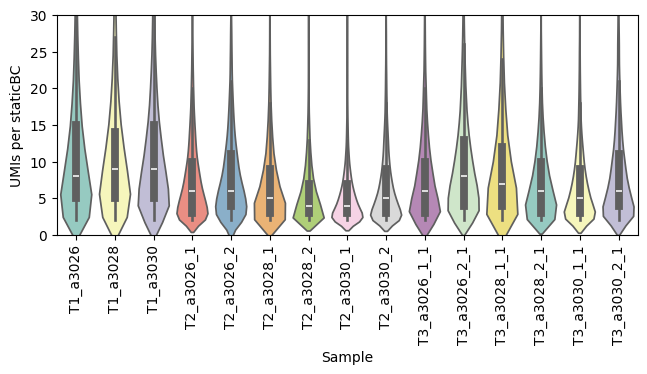

In [52]:
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(7, 4)
sns.violinplot(x='Sample',
               y = "num", 
               data = umi_count,
               palette="Set3"
              )

plt.ylabel("UMIs per staticBC")
plt.ylim(0, 30)
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.12, right=0.95, top=0.95, bottom=0.4)
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/staticBC_expression_level.pdf')
plt.show()

## whiltelist filter

In [26]:
staticBC_whitelist = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/metadata/staticBC_whitelist.txt',header=None)
umi_count = umi_count[umi_count['intBC'].isin(staticBC_whitelist[0].to_list())]

In [27]:
umi_count

## call clone

In [28]:
umi_table_tmp = pd.merge(umi_table,umi_count,how='inner',on=['cellBC','intBC'])

In [29]:
piv = pd.pivot_table(
        umi_table_tmp, index="cellBC", columns="intBC", values="UMI", aggfunc="count"
    )

In [30]:
piv.shape

In [31]:
piv = piv.fillna(0)

In [32]:
piv = piv.div(piv.sum(axis=1), axis=0)

In [33]:
pivbin = piv.copy()
pivbin[pivbin > 0] = 1
intBC_sums = pivbin.sum(0)
ordered_intBCs = intBC_sums.sort_values(ascending=False).index.tolist()

piv = piv.loc[pivbin.index[pivbin.sum(1) > 1],ordered_intBCs]

In [122]:
pivbin.sum(1)

cellBC
T1_a3026_AAACCCAAGACTAGAT         3.0
T1_a3026_AAACCCACATGAGATA         3.0
T1_a3026_AAACCCAGTCGCTGCA         4.0
T1_a3026_AAACCCAGTCTCGCGA        36.0
T1_a3026_AAACCCATCACGGGAA         2.0
                                 ... 
T3_a3030_2_1_TTTGTTGAGTAGACCG     3.0
T3_a3030_2_1_TTTGTTGCACGGTGTC     3.0
T3_a3030_2_1_TTTGTTGGTAAGATCA     2.0
T3_a3030_2_1_TTTGTTGTCCGCAAAT     4.0
T3_a3030_2_1_TTTGTTGTCGGTATGT     7.0
Length: 91207, dtype: float64

<Figure size 400x400 with 0 Axes>

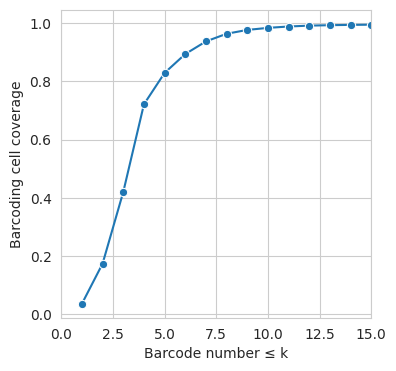

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据
nums = np.array(pivbin.sum(1).astype('int'))

# 计算不同阈值 k 时，小于等于 k 的数量
max_val = nums.max()
distribution = {k: np.sum(nums <= k) for k in range(1, max_val + 1)}

# 转换为 DataFrame
df = pd.DataFrame(list(distribution.items()), columns=["Threshold", "Cumulative Count"])
df['Cumulative Count'] = df['Cumulative Count']/91411

# 绘制累加分布曲线
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(4, 4)
sns.set_style("whitegrid")
plt.figure(figsize=(4, 4))
sns.lineplot(data=df, x="Threshold", y="Cumulative Count", marker="o")
# 添加标题和标签
plt.xlabel("Barcode number ≤ k")
plt.ylabel("Barcoding cell coverage")
plt.xlim(0,15)
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2/staticBarcode_coverage_stat.pdf')
plt.show()


In [33]:
piv.shape

(87864, 12869)

In [35]:
87864/91411

0.9611972300926585

In [129]:
import pickle as pic
with open('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/piv.pickle.T1T2T3a', 'wb') as f:
    pic.dump(piv, f)


piv1 = piv.copy()
piv1[piv1 > 0] = 1
test = piv1.sum(1).reset_index()

In [130]:
test = piv1.sum(1).reset_index()
test.columns = ['cellBC','count']

In [131]:
df = piv1.apply(sum,axis=1).sort_values().value_counts().reset_index()
df['index'] = df['index'].astype('int')

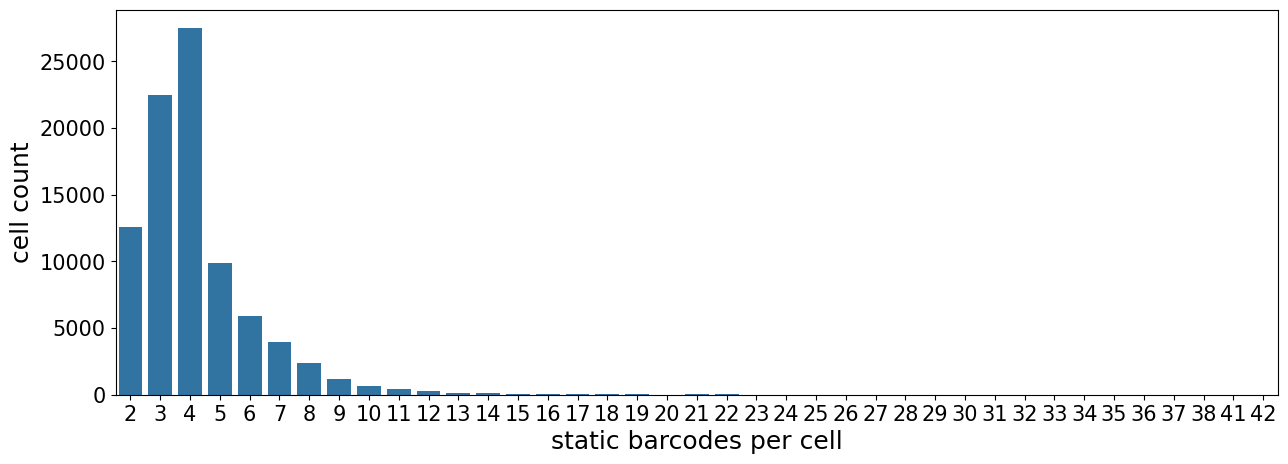

In [132]:
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(15, 5) 
ax = sns.barplot(data=df,x='index',y='count')
ax.set_xlabel('static barcodes per cell', fontsize=18)
ax.set_ylabel('cell count', fontsize=18)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

In [4]:
import pickle as pic
with open('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/piv.pickle.T1T2T3a', 'rb') as f:
    piv = pic.load(f)

In [5]:
piv

intBC,CCAAATCGGACGTT,GTTAGGGCGACGGA,CGGAACCTGAAAAC,GTTTTATCCGCCTG,ACACGACAAGAACG,CTCCAGGCGAGAAA,CCGTACGCGGCACG,GGCGCGCGTCATAA,GGCCCGGTGCAGAG,AGCGCGGCGCAGAG,...,CCTGCCACGCCCGA,GTCGGTGAGACGTA,CCTGAGGGGCAAAT,CCTCTCGCCCGCGT,GTCGTCGCGGGACC,CCTCGCTTCCATCG,GTCGTGAGCGCCTC,CCTCCTAGATCACC,GTCGTGGCGCAGAA,CTGGAAGGCCACGC
cellBC,,,,,,,,,,,,,,,,,,,,,
T1_a3026_AAACCCAAGACTAGAT,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCACATGAGATA,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCAGTCGCTGCA,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCAGTCTCGCGA,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCATCACGGGAA,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T3_a3030_2_1_TTTGTTGAGTAGACCG,0.482759,0.37931,0.137931,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3030_2_1_TTTGTTGCACGGTGTC,0.520000,0.32000,0.160000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3030_2_1_TTTGTTGGTAAGATCA,0.727273,0.00000,0.000000,0.272727,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
piv1 = piv.copy()
piv1[piv1 > 0] = 1
piv1

intBC,CCAAATCGGACGTT,GTTAGGGCGACGGA,CGGAACCTGAAAAC,GTTTTATCCGCCTG,ACACGACAAGAACG,CTCCAGGCGAGAAA,CCGTACGCGGCACG,GGCGCGCGTCATAA,GGCCCGGTGCAGAG,AGCGCGGCGCAGAG,...,CCTGCCACGCCCGA,GTCGGTGAGACGTA,CCTGAGGGGCAAAT,CCTCTCGCCCGCGT,GTCGTCGCGGGACC,CCTCGCTTCCATCG,GTCGTGAGCGCCTC,CCTCCTAGATCACC,GTCGTGGCGCAGAA,CTGGAAGGCCACGC
cellBC,,,,,,,,,,,,,,,,,,,,,
T1_a3026_AAACCCAAGACTAGAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCACATGAGATA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCAGTCGCTGCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCAGTCTCGCGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCATCACGGGAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T3_a3030_2_1_TTTGTTGAGTAGACCG,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3030_2_1_TTTGTTGCACGGTGTC,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3030_2_1_TTTGTTGGTAAGATCA,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
piv1_T1 = piv1.loc[[ cellBC.split('_')[0]=='T1' for cellBC in piv1.index],:]
piv1_T1

intBC,CCAAATCGGACGTT,GTTAGGGCGACGGA,CGGAACCTGAAAAC,GTTTTATCCGCCTG,ACACGACAAGAACG,CTCCAGGCGAGAAA,CCGTACGCGGCACG,GGCGCGCGTCATAA,GGCCCGGTGCAGAG,AGCGCGGCGCAGAG,...,CCTGCCACGCCCGA,GTCGGTGAGACGTA,CCTGAGGGGCAAAT,CCTCTCGCCCGCGT,GTCGTCGCGGGACC,CCTCGCTTCCATCG,GTCGTGAGCGCCTC,CCTCCTAGATCACC,GTCGTGGCGCAGAA,CTGGAAGGCCACGC
cellBC,,,,,,,,,,,,,,,,,,,,,
T1_a3026_AAACCCAAGACTAGAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCACATGAGATA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCAGTCGCTGCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCAGTCTCGCGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCATCACGGGAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1_a3030_TTTGTTGGTCACTGAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3030_TTTGTTGGTGGAATGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3030_TTTGTTGTCACATTGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
piv1_T1 = piv1_T1.loc[:,piv1_T1.sum(0)!=0]
piv1_T1

intBC,CCAAATCGGACGTT,GTTAGGGCGACGGA,CGGAACCTGAAAAC,GTTTTATCCGCCTG,ACACGACAAGAACG,CTCCAGGCGAGAAA,CCGTACGCGGCACG,GGCGCGCGTCATAA,GGCCCGGTGCAGAG,AGCGCGGCGCAGAG,...,CCTGCCACGCCCGA,GTCGGTGAGACGTA,CCTGAGGGGCAAAT,CCTCTCGCCCGCGT,GTCGTCGCGGGACC,CCTCGCTTCCATCG,GTCGTGAGCGCCTC,CCTCCTAGATCACC,GTCGTGGCGCAGAA,CTGGAAGGCCACGC
cellBC,,,,,,,,,,,,,,,,,,,,,
T1_a3026_AAACCCAAGACTAGAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCACATGAGATA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCAGTCGCTGCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCAGTCTCGCGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AAACCCATCACGGGAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1_a3030_TTTGTTGGTCACTGAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3030_TTTGTTGGTGGAATGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3030_TTTGTTGTCACATTGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
piv1_T2 = piv1.loc[[ cellBC.split('_')[0]!='T1' for cellBC in piv1.index],:]
piv1_T2

intBC,CCAAATCGGACGTT,GTTAGGGCGACGGA,CGGAACCTGAAAAC,GTTTTATCCGCCTG,ACACGACAAGAACG,CTCCAGGCGAGAAA,CCGTACGCGGCACG,GGCGCGCGTCATAA,GGCCCGGTGCAGAG,AGCGCGGCGCAGAG,...,CCTGCCACGCCCGA,GTCGGTGAGACGTA,CCTGAGGGGCAAAT,CCTCTCGCCCGCGT,GTCGTCGCGGGACC,CCTCGCTTCCATCG,GTCGTGAGCGCCTC,CCTCCTAGATCACC,GTCGTGGCGCAGAA,CTGGAAGGCCACGC
cellBC,,,,,,,,,,,,,,,,,,,,,
T2_a3026_1_AAACCCAAGACAACTA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T2_a3026_1_AAACCCAAGCCAAGCA,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T2_a3026_1_AAACCCACACATTACG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T2_a3026_1_AAACCCAGTGTTCCAA,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T2_a3026_1_AAACCCATCCAACTAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T3_a3030_2_1_TTTGTTGAGTAGACCG,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3030_2_1_TTTGTTGCACGGTGTC,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3030_2_1_TTTGTTGGTAAGATCA,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
piv1_T2 = piv1_T2.loc[:,piv1_T2.sum(0)!=0]
piv1_T2

intBC,CCAAATCGGACGTT,GTTAGGGCGACGGA,CGGAACCTGAAAAC,GTTTTATCCGCCTG,ACACGACAAGAACG,CTCCAGGCGAGAAA,CCGTACGCGGCACG,GGCGCGCGTCATAA,GGCCCGGTGCAGAG,AGCGCGGCGCAGAG,...,CCAAGAGGAACCGT,TAAACTCCACGCGG,CAGTGAGGAAACCT,TACCAACTACTAAA,GTTCCGTACCTAAG,CAGAAGGCCGGGTC,GTCAGGGGAACCGG,CGGCCGACCAGAAT,GTAAGGGCCCGGAG,CCGGATAACCTGGT
cellBC,,,,,,,,,,,,,,,,,,,,,
T2_a3026_1_AAACCCAAGACAACTA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T2_a3026_1_AAACCCAAGCCAAGCA,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T2_a3026_1_AAACCCACACATTACG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T2_a3026_1_AAACCCAGTGTTCCAA,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T2_a3026_1_AAACCCATCCAACTAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T3_a3030_2_1_TTTGTTGAGTAGACCG,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3030_2_1_TTTGTTGCACGGTGTC,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3030_2_1_TTTGTTGGTAAGATCA,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
piv1_T1.columns[~piv1_T1.columns.isin(piv1_T2.columns)]

Index(['GTCCTTAGGTCAGA', 'GGGTCGTGGCGTAG', 'AGGCCGCTGGGAGG', 'CCAAATAAGGGTGT',
       'GGCAGGGGTCCACG', 'AGCAGCAGAACGGC', 'GGTCCAACCAGCAA', 'TAGTATCGGAATAA',
       'AGGAAGGCGCCAAG', 'ACGGAGCCCGCGAG',
       ...
       'CCTGCCACGCCCGA', 'GTCGGTGAGACGTA', 'CCTGAGGGGCAAAT', 'CCTCTCGCCCGCGT',
       'GTCGTCGCGGGACC', 'CCTCGCTTCCATCG', 'GTCGTGAGCGCCTC', 'CCTCCTAGATCACC',
       'GTCGTGGCGCAGAA', 'CTGGAAGGCCACGC'],
      dtype='object', name='intBC', length=11460)

In [ ]:
BL检测到 12777种barcode,有11460种barcode在EE/LE没有被检测到

In [34]:
min_clust_size = 0 
min_intbc_thresh = 0.1
kinship_thresh = 0.25 
piv_assigned = lineage_utils.assign_lineage_groups(
    piv,
    min_clust_size,
    min_intbc_thresh=min_intbc_thresh,
    kinship_thresh=kinship_thresh,
)

In [ ]:
piv_assigned['lineageGrp'].value_counts()

In [35]:
tmp = piv_assigned.copy()

In [57]:
piv_assigned = tmp.copy()

In [58]:
piv_assigned

intBC,AAAAAACGGAGTGC,AAAAACTATGACGA,AAAAAGACCAGGAG,AAAAAGCCACATAG,AAAAAGCGTCACTT,AAAAATCTCGCGAT,AAAACATCCATGAA,AAAACGCTCCCGGG,AAAACTTTTGCTGA,AAAAGACACTCTAG,...,TTTTGCTCGGGGCG,TTTTGGATATCGAG,TTTTGGCCCCCCTG,TTTTGGTCACAGCG,TTTTTCCGCCTCCA,TTTTTCGAACGGCA,TTTTTCGGCCAGAG,TTTTTGTGCCGTTG,TTTTTTACCCAGGA,lineageGrp
cellBC,,,,,,,,,,,,,,,,,,,,,
T1_a3026_AACAAGACAGGTGAGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
T1_a3026_AACCACACACGAGAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
T1_a3026_AACGGGAAGTTAACGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
T1_a3026_AAGGTAAAGTTGCATC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
T1_a3026_AAGGTAACACAGCCAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1_a3028_TTGGGATAGTCCTGTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176
T1_a3028_TTGGGCGCACTTGGCG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176
T1_a3030_GTTTGGAAGCCTCGTG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176


In [59]:
piv_assigned['lineageGrp'].value_counts()

lineageGrp
1      24218
2       4664
3       3474
7       2359
5       1840
       ...  
157       38
163       33
143       29
165       28
166       14
Name: count, Length: 176, dtype: int64

In [ ]:
# refine after lGs made
master_LGs, master_intBCs = lineage_utils.filter_intbcs_lg_sets(
    piv_assigned, min_intbc_thresh=min_intbc_thresh
)

# Reassigning cells to refined lineage groups by kinship
kinship_scores = lineage_utils.score_lineage_kinships(
    piv_assigned, master_LGs, master_intBCs
)
kinship_scores = kinship_scores[kinship_scores['maxOverlap'] > 0.5] # doublet remove
piv_assigned = piv_assigned.loc[kinship_scores.index,:]
piv_assigned['lineageGrp'] = kinship_scores['lineageGrp']

In [52]:
piv_assigned

intBC,AAAAAACGGAGTGC,AAAAACTATGACGA,AAAAAGACCAGGAG,AAAAAGCCACATAG,AAAAAGCGTCACTT,AAAAATCTCGCGAT,AAAACATCCATGAA,AAAACGCTCCCGGG,AAAACTTTTGCTGA,AAAAGACACTCTAG,...,TTTTGCTCGGGGCG,TTTTGGATATCGAG,TTTTGGCCCCCCTG,TTTTGGTCACAGCG,TTTTTCCGCCTCCA,TTTTTCGAACGGCA,TTTTTCGGCCAGAG,TTTTTGTGCCGTTG,TTTTTTACCCAGGA,lineageGrp
cellBC,,,,,,,,,,,,,,,,,,,,,
T1_a3026_AAACCCAAGACTAGAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,847
T1_a3026_AAACCCACATGAGATA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129
T1_a3026_AAACCCAGTCGCTGCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,664
T1_a3026_AAACCCAGTCTCGCGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,538
T1_a3026_AAACCCATCACGGGAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T3_a3030_2_1_TTTGTTGAGTAGACCG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
T3_a3030_2_1_TTTGTTGCACGGTGTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
T3_a3030_2_1_TTTGTTGGTAAGATCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
piv_assigned['lineageGrp'] = pd.Categorical(piv_assigned['lineageGrp'], categories=piv_assigned['lineageGrp'].value_counts().index, ordered=True)
piv_assigned = piv_assigned.sort_values('lineageGrp')

In [88]:
import pickle as pic
with open('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/piv_assigned.pickle', 'wb') as f:
    pic.dump(piv_assigned, f)

In [ ]:
master_LGs, master_intBCs = lineage_utils.filter_intbcs_lg_sets(
    piv_assigned, min_intbc_thresh=min_intbc_thresh
)

LGs = []
for LG in  piv_assigned['lineageGrp']:
    if LG in LGs:
        pass
    else:
        LGs.append(LG)

intBCs_all = []
master_intBCs_filtered = {} 
for LG in LGs:
    intBCs = master_intBCs[(int(LG),)]
    intBCs = list(set(intBCs).difference(set(intBCs_all)))
    master_intBCs_filtered[(int(LG),)] = intBCs
    intBCs_all = intBCs_all + intBCs

In [ ]:
piv_assigned = piv_assigned.loc[piv_assigned['lineageGrp'].isin(LGs),:]
piv_assigned

In [ ]:
piv_assigned['lineageGrp'] = pd.Categorical(piv_assigned['lineageGrp'], categories=piv_assigned['lineageGrp'].value_counts().index, ordered=True)
piv_assigned = piv_assigned.sort_values('lineageGrp')

In [ ]:
piv_assigned.shape

In [ ]:
len(set(piv_assigned['lineageGrp']))

In [63]:
import pickle as pic
with open('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/master_intBCs_filtered.pickle.T1T2T3a', 'wb') as f:
    pic.dump(master_intBCs_filtered, f)

In [3]:
import pickle as pic
with open('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/master_intBCs_filtered.pickle.T1T2T3a', 'rb') as f:
    master_intBCs_filtered = pic.load(f)

In [ ]:
intBCs_final = sum(list(master_intBCs_filtered.values()),[]) 

In [ ]:
piv_assigned_sub = piv_assigned.iloc[:,0:piv_assigned.shape[1]-1]
piv_assigned_sub[piv_assigned_sub > 0] = 1
piv_assigned_sub = piv_assigned_sub.loc[:,intBCs_final]

plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(15, 15)
ax = sns.clustermap(piv_assigned_sub, cmap='binary',figsize=(15, 15),row_cluster=False,col_cluster=False,yticklabels=False,xticklabels=False)#yticklabels=False,xticklabels=False,,cbar=False,figsize=(7, 7)
ax.cax.set_visible(False)
plt.show()

<Figure size 700x1000 with 0 Axes>

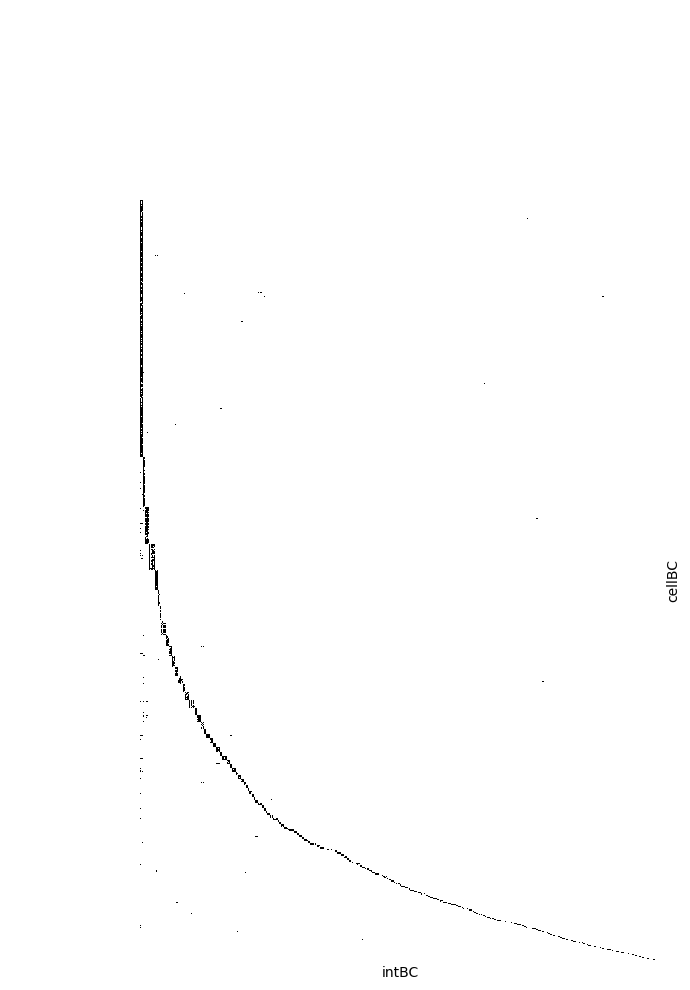

In [76]:
piv_assigned_sub = piv_assigned.iloc[:,0:piv_assigned.shape[1]-1]
piv_assigned_sub[piv_assigned_sub > 0] = 1
piv_assigned_sub = piv_assigned_sub.loc[:,intBCs_final]

plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(7, 10)
ax = sns.clustermap(piv_assigned_sub, cmap='binary',figsize=(7, 10),row_cluster=False,col_cluster=False,yticklabels=False,xticklabels=False)#yticklabels=False,xticklabels=False,,cbar=False,figsize=(7, 7)
ax.cax.set_visible(False)
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/cell_clone_statiBC_heatmap.png',dpi=300)
plt.show()

<Figure size 500x500 with 0 Axes>

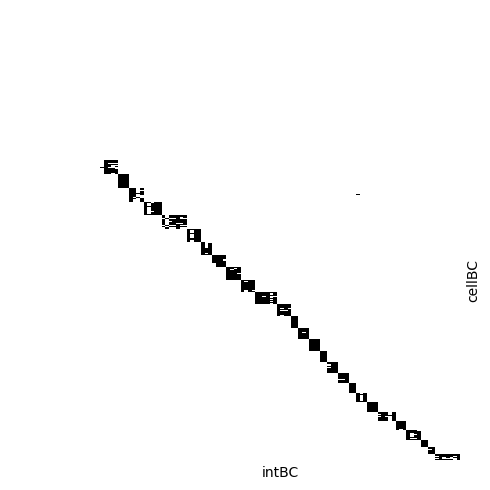

In [79]:
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(5, 5) 
ax = sns.clustermap(piv_assigned_sub.iloc[68363:69863,711:811], cmap='binary',figsize=(5, 5),row_cluster=False,col_cluster=False,yticklabels=False,xticklabels=False)#yticklabels=False,xticklabels=False,,cbar=False,figsize=(7, 7)
ax.cax.set_visible(False)
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/cell_clone_statiBC_heatmap_final100SBs.pdf')
plt.show()

In [79]:
piv_assigned_sub

intBC,CCAAATCGGACGTT,GTTTTATCCGCCTG,CGGAACCTGAAAAC,GTTAGGGCGACGGA,CTCCAGGCGAGAAA,ACACGACAAGAACG,GGCGCGCGTCATAA,CCGTACGCGGCACG,AGGGGTGCAAAGCC,AGCGCGGCGCAGAG,...,TCGGGAGCACCAGG,TTGAGCCCTCCCTT,GGTGGAGCGAGCCG,CCGTATGCCGTAAA,GCAGTCGACACGAA,GTTAACGTGATCTG,AGCGCGGACACCGG,GGTCAGGCGCCGGG,GGGCGCCTAACCCT,GGCCGGTAACGAAA
cellBC,,,,,,,,,,,,,,,,,,,,,
T2_a3030_2_AACCATGGTCGTCATA,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T2_a3030_2_GGTTAACTCGTAGGAG,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T2_a3026_1_CAGGGCTTCTCCACTG,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T2_a3030_2_GGTTAACTCTTCGGTC,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T2_a3030_2_GGTTCTCCACCACATA,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1_a3028_TCCGGGATCAGTGTGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
T1_a3028_GTCTACCCAGGTATGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
T1_a3028_ATTGGGTAGTTACGGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [80]:
from collections import Counter


Counter([cellBC.split('_')[0] for cellBC in piv_assigned_sub.index])

Counter({'T2': 24640, 'T3': 28294, 'T1': 16929})

In [81]:
df = piv_assigned_sub.apply(sum,axis=1).sort_values().value_counts().reset_index()
df['index'] = df['index'].astype('int')

In [82]:
df

,index,count
0,4,24413
1,3,18851
2,2,9916
3,5,7058
4,6,3935
5,7,2608
6,8,1625
7,9,655
8,10,262
9,1,229


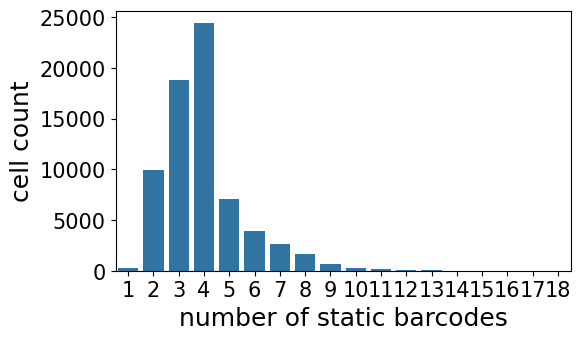

In [87]:
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(7, 4) 
ax = sns.barplot(data=df,x='index',y='count')
ax.set_xlabel('number of static barcodes', fontsize=18)
ax.set_ylabel('cell count', fontsize=18)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.3)
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/cell_staticBC_number.pdf')
plt.show()

In [158]:
piv_assigned = piv_assigned.loc[piv_assigned_sub.index,:]

In [159]:
piv_assigned['Time.point'] = [cellBC.split('_')[0] for cellBC in piv_assigned.index]

In [160]:
piv_assigned['Sample'] = [ '_'.join(cellBC.split('_')[0:-1]) for cellBC in piv_assigned.index]

In [161]:
cell_lineage = piv_assigned['lineageGrp']
cell_lineage.to_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.T1_T2_T3a.csv')

In [162]:
Counter(piv_assigned['Sample'] )

Counter({'T2_a3030_2': 6755,
         'T2_a3026_1': 5839,
         'T3_a3026_1_1': 2023,
         'T1_a3030': 5786,
         'T3_a3026_2_1': 6122,
         'T2_a3028_1': 3902,
         'T2_a3030_1': 2205,
         'T3_a3030_2_1': 5645,
         'T2_a3026_2': 2268,
         'T2_a3028_2': 3671,
         'T1_a3026': 5183,
         'T3_a3030_1_1': 4531,
         'T1_a3028': 5960,
         'T3_a3028_2_1': 3271,
         'T3_a3028_1_1': 6702})

In [163]:
clone_counts = piv_assigned[['Time.point','Sample','lineageGrp']].value_counts().reset_index()

In [164]:
set(clone_counts.Sample)

{'T1_a3026',
 'T1_a3028',
 'T1_a3030',
 'T2_a3026_1',
 'T2_a3026_2',
 'T2_a3028_1',
 'T2_a3028_2',
 'T2_a3030_1',
 'T2_a3030_2',
 'T3_a3026_1_1',
 'T3_a3026_2_1',
 'T3_a3028_1_1',
 'T3_a3028_2_1',
 'T3_a3030_1_1',
 'T3_a3030_2_1'}

In [3]:
import pickle as pic
import pandas as pd

In [8]:
staticBC_8x = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/metadata/8x_static_barcode/8xsgSB_Lib_pre.tsv',sep='\t',header=None)
staticBC_8x.columns = ['staticBC','readCount']
staticBC_8x

,staticBC,readCount
0,TCTAGATGAGAAGCG,52194
1,GCGCACTCCGCGCA,1291
2,CAGCGGACGTCCGC,1129
3,CTCCAGACCCCGCC,1126
4,GCCGGCGGGCATCT,1072
...,...,...
684368,AAAGAGGGGCGGGC,1
684369,TTAAGGTCGGCCCA,1
684370,GAGGCCGTCGGGGA,1
684371,GCCGGGCGGATCCG,1


In [9]:
staticBC_cas9 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/metadata/cas9_static_barcode/Cas9StaticBarcode_Library_match_pre.tsv',sep='\t',header=None)
staticBC_cas9.columns = ['staticBC','readCount']
staticBC_cas9

,staticBC,readCount
0,TAATATCAGCCACT,13908
1,ACCCGAGGCGCGAC,1163
2,TTGGACGCTCGGGC,1030
3,GCCTCCGACACGCC,965
4,GTCGCGGCCGCCCC,954
...,...,...
299600,TGGGAGGGCCCTAG,1
299601,TTCGAGGTGTATCG,1
299602,ACCGCTGTCTCTGC,1
299603,TCGCGAGTGTCCGG,1


In [4]:
with open('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/master_intBCs_filtered.pickle.T1T2T3a','rb')as f:
    master_intBCs_filtered = pic.load(f)

lineageGrp_intBCs = pd.DataFrame([master_intBCs_filtered]).T
lineageGrp_intBCs.columns = ['intBCs']
lineageGrp_intBCs

,intBCs
"(1,)","[GTTAGGGCGACGGA, GTTTTATCCGCCTG, CGGAACCTGAAAA..."
"(2,)","[CTCCAGGCGAGAAA, ACACGACAAGAACG, CCGTACGCGGCAC..."
"(3,)","[TTTCGCAACCCCCC, AGCGCGGCGCAGAG, GCATAGCCACCTG..."
"(7,)","[AGACGCCCCAACGT, ACAGACATATTGTG, AGCTTGAATTTCG..."
"(5,)","[GCGAGGGATCCAAG, GCCCCTGCCTACAA, TGCGGAAGACAGC..."
...,...
"(157,)","[TAATGCCACTTCCG, GAGAAAGGCTCCGA, TGCGCAAGATAACC]"
"(158,)","[AAGGCGATCCCCGC, ATCACGGCAAAATG, CGGTCGATCAAGG..."
"(163,)","[TCGGGAGCACCAGG, CGGCCAAGGGAGGC]"
"(165,)","[GGTGGAGCGAGCCG, TTGAGCCCTCCCTT]"


In [12]:
SB_cas9 = []
SB_8x = []
for intBCs,lineageGrp in zip(lineageGrp_intBCs.intBCs,lineageGrp_intBCs.index):
    if len(set(intBCs).intersection(set(staticBC_8x['staticBC']))) > 0:
        SB_8x.append(lineageGrp)
    if len(set(intBCs).intersection(set(staticBC_cas9['staticBC']))) > 0:
        SB_cas9.append(lineageGrp)
    

In [14]:
len(SB_cas9)

163

In [15]:
len(SB_8x)

174

In [17]:
len(set(SB_cas9).intersection(set(SB_8x)))

162

In [26]:
import pickle as pic
with open('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/master_intBCs_filtered.pickle.T1T2T3a', 'rb') as f:
    master_intBCs_filtered = pic.load(f)

In [28]:
clone_SB_num = []
for clone in master_intBCs_filtered:
    clone_SB_num.append(len(master_intBCs_filtered[clone]))

(array([56., 38., 58., 12.,  7.,  3.,  0.,  0.,  0.,  1.]),
 array([ 2. ,  3.5,  5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. ]),
 <BarContainer object of 10 artists>)

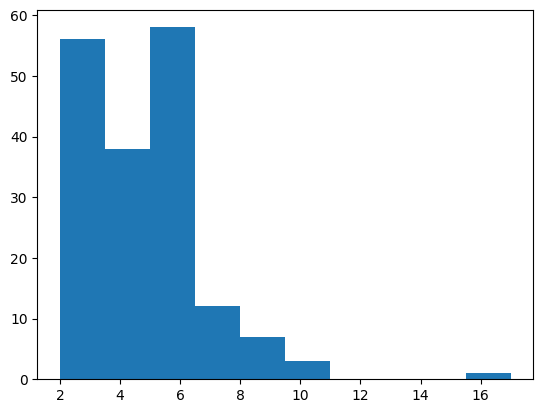

In [29]:
plt.hist(clone_SB_num)

In [32]:
len(master_intBCs_filtered)

175

In [31]:
np.median(clone_SB_num)

4.0

In [36]:
np.mean(clone_SB_num)

4.634285714285714

In [37]:
12777/4.6

2777.608695652174

In [38]:
(12777-11460)/4.6

286.304347826087

In [35]:
22000/10.3

2135.922330097087

In [6]:
import pandas as pd
new_lineageGrp = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/new_lineageGrp.csv')
new_lineageGrp.index = [ 'C' + str(old_lineageGrp) for old_lineageGrp in new_lineageGrp['old_lineageGrp']]
new_lineageGrp['new_lineageGrp'] = [ 'C'+ str(new_lineageGrp) for new_lineageGrp in new_lineageGrp['new_lineageGrp']]
new_lineageGrp

,new_lineageGrp,old_lineageGrp
C1,C1,1
C2,C2,2
C3,C3,3
C7,C4,7
C5,C5,5
...,...,...
C158,C171,158
C157,C172,157
C163,C173,163
C165,C174,165


In [17]:
import pickle as pic
with open('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/master_intBCs_filtered.pickle.T1T2T3a', 'rb') as f:
    master_intBCs_filtered = pic.load(f)

In [18]:
master_intBCs_filtered

{(1,): ['CGGAACCTGAAAAC',
  'GTTTTATCCGCCTG',
  'CCAAATCGGACGTT',
  'GTTAGGGCGACGGA'],
 (2,): ['CCGTACGCGGCACG',
  'ACACGACAAGAACG',
  'GGCGCGCGTCATAA',
  'CTCCAGGCGAGAAA'],
 (3,): ['AGGGGTGCAAAGCC',
  'GGCCCGGTGCAGAG',
  'GCATAGCCACCTGG',
  'CGGGAAAGGTACAG',
  'TTTCGCAACCCCCC',
  'AGCGCGGCGCAGAG'],
 (7,): ['CGGCAAACGGGGGG',
  'TGCTGTGAGCGCGC',
  'AGTGGGGACGTAGG',
  'AGACGCCCCAACGT',
  'TTGCGTGAGTACGA',
  'AGCTTGAATTTCGG',
  'GGACGCGGAGCGGG',
  'GGAGAGGCCCGGAG',
  'ACAGACATATTGTG'],
 (5,): ['CAGACCCCAGTCCG',
  'GCCCCTGCCTACAA',
  'GCGAGGGATCCAAG',
  'TGCGGAAGACAGCG'],
 (4,): ['CGACACAACGTTCG', 'CGGTCGAGAATTGA', 'GGATCACACTCAAA'],
 (6,): ['CGGAGGGCGGGCCT', 'ATCCAGGGAAATAA', 'TTTGCTCTCGCTTT'],
 (12,): ['GCCACTCACCCAGG',
  'TAGAGTGAATCCCG',
  'GGCACGATGCGAGT',
  'TAGCCCAGATTACT',
  'AAGAAAACACGTAC',
  'CGATCTGTCTAGAA',
  'CCTGTTTTGGGCTC'],
 (10,): ['ATCAGGATCTTCCT',
  'GTAGCGCGGGCGCA',
  'AGCTATCGGAAAAA',
  'CCCCCCGAGTCGGG',
  'GCAGCTCCAAAGGC'],
 (9,): ['GGATAGGCGGGTAG',
  'ATATCAATGTACTT

In [19]:
master_intBCs_filtered_new = {}

In [20]:
for lineageGrp,barcode_set in master_intBCs_filtered.items():
    master_intBCs_filtered_new[new_lineageGrp.loc['C'+str(lineageGrp[0]),'new_lineageGrp']] = barcode_set

In [21]:
master_intBCs_filtered_new

{'C1': ['CGGAACCTGAAAAC',
  'GTTTTATCCGCCTG',
  'CCAAATCGGACGTT',
  'GTTAGGGCGACGGA'],
 'C2': ['CCGTACGCGGCACG',
  'ACACGACAAGAACG',
  'GGCGCGCGTCATAA',
  'CTCCAGGCGAGAAA'],
 'C3': ['AGGGGTGCAAAGCC',
  'GGCCCGGTGCAGAG',
  'GCATAGCCACCTGG',
  'CGGGAAAGGTACAG',
  'TTTCGCAACCCCCC',
  'AGCGCGGCGCAGAG'],
 'C4': ['CGGCAAACGGGGGG',
  'TGCTGTGAGCGCGC',
  'AGTGGGGACGTAGG',
  'AGACGCCCCAACGT',
  'TTGCGTGAGTACGA',
  'AGCTTGAATTTCGG',
  'GGACGCGGAGCGGG',
  'GGAGAGGCCCGGAG',
  'ACAGACATATTGTG'],
 'C5': ['CAGACCCCAGTCCG',
  'GCCCCTGCCTACAA',
  'GCGAGGGATCCAAG',
  'TGCGGAAGACAGCG'],
 'C6': ['CGACACAACGTTCG', 'CGGTCGAGAATTGA', 'GGATCACACTCAAA'],
 'C7': ['CGGAGGGCGGGCCT', 'ATCCAGGGAAATAA', 'TTTGCTCTCGCTTT'],
 'C8': ['GCCACTCACCCAGG',
  'TAGAGTGAATCCCG',
  'GGCACGATGCGAGT',
  'TAGCCCAGATTACT',
  'AAGAAAACACGTAC',
  'CGATCTGTCTAGAA',
  'CCTGTTTTGGGCTC'],
 'C9': ['ATCAGGATCTTCCT',
  'GTAGCGCGGGCGCA',
  'AGCTATCGGAAAAA',
  'CCCCCCGAGTCGGG',
  'GCAGCTCCAAAGGC'],
 'C10': ['GGATAGGCGGGTAG',
  'ATATCAATGTACTT'

In [23]:
import pickle as pic
with open('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/master_intBCs_filtered.pickle.BLEELE.new', 'wb') as f:
    pic.dump(master_intBCs_filtered_new, f)

## clone size distribution

In [1]:
import pandas as pd

In [2]:
cell_lineage = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.T1_T2_T3a.csv')
cell_lineage['time'] = [ cellBC.split('_')[0] for cellBC in cell_lineage['cellBC']]
cell_lineage

,cellBC,lineageGrp,time
0,T2_a3030_2_AACCATGGTCGTCATA,1,T2
1,T2_a3030_2_GGTTAACTCGTAGGAG,1,T2
2,T2_a3026_1_CAGGGCTTCTCCACTG,1,T2
3,T2_a3030_2_GGTTAACTCTTCGGTC,1,T2
4,T2_a3030_2_GGTTCTCCACCACATA,1,T2
...,...,...,...
69858,T1_a3028_TCCGGGATCAGTGTGT,143,T1
69859,T1_a3028_GTCTACCCAGGTATGG,143,T1
69860,T1_a3028_ATTGGGTAGTTACGGG,143,T1
69861,T1_a3028_CCTGCATGTGTCTAAC,143,T1


In [3]:
len(set(cell_lineage['lineageGrp']))

175

In [6]:
pivot_df = cell_lineage.groupby(["lineageGrp", "time"]).size().unstack(fill_value=0)
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]
pivot_df

time,T1,T2,T3
lineageGrp,,,
1,254,11854,11487
2,166,2815,1581
3,151,1285,2011
7,102,899,1404
5,132,90,1580
...,...,...,...
158,38,0,0
157,1,14,23
163,31,0,0


<Figure size 2000x600 with 0 Axes>

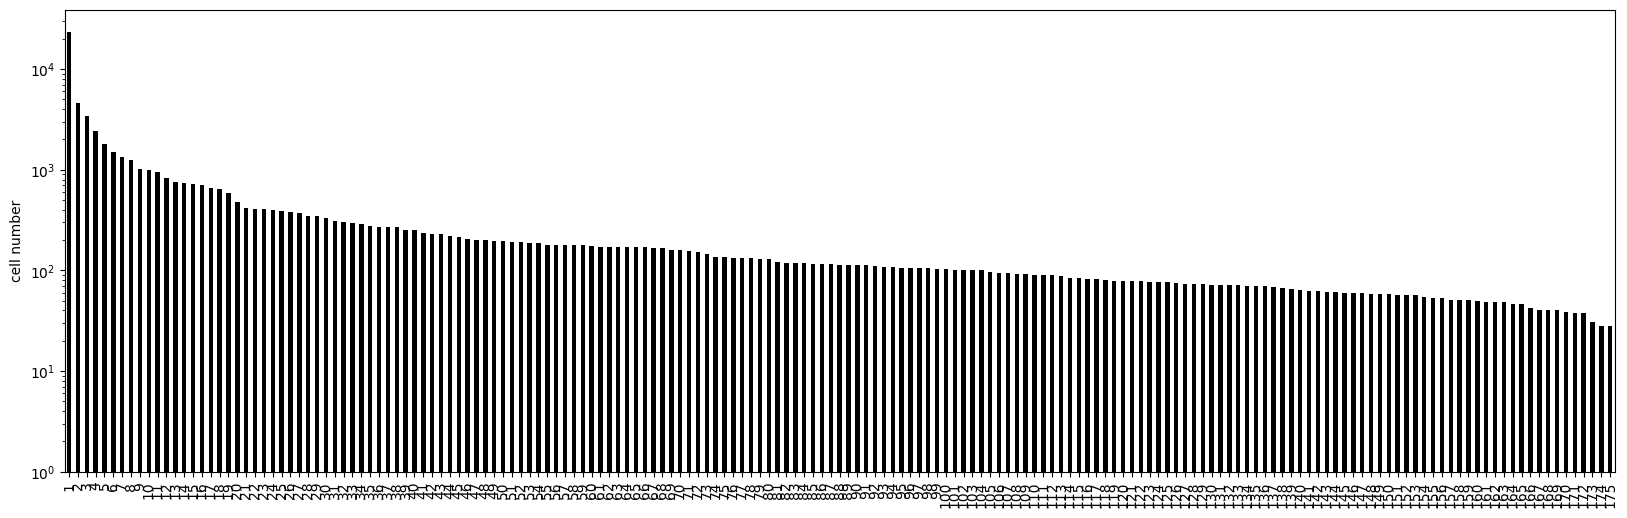

In [17]:
import matplotlib.pyplot as plt
pivot_df = cell_lineage.groupby(["lineageGrp", "time"]).size().unstack(fill_value=0)
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]
pivot_df = pivot_df[['T3','T2','T1']]
pivot_df.columns = ['LE','EE','BL']
pivot_df.index = range(1,176)
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(20, 6)
ax = pivot_df.plot(kind="bar", stacked=True, color=['#000000','#000000', '#000000'], figsize=(20, 6))
#ax.set_xticks(range(1,len(pivot_df.index)+1))
ax.set_yscale("log")
ax.legend().remove()
plt.ylabel('cell number')
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2/clone_size_distribution.pdf')

In [10]:
pivot_df['old_lineageGrp'] = pivot_df.index.to_list()
pivot_df['new_lineageGrp'] = range(1,176)
pivot_df

time,T1,T2,T3,new_lineageGrp,old_lineageGrp
lineageGrp,,,,,
1,254,11854,11487,1,1
2,166,2815,1581,2,2
3,151,1285,2011,3,3
7,102,899,1404,4,7
5,132,90,1580,5,5
...,...,...,...,...,...
158,38,0,0,171,158
157,1,14,23,172,157
163,31,0,0,173,163


In [12]:
pivot_df[['new_lineageGrp','old_lineageGrp']].to_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/new_lineageGrp.csv',index=False)

In [16]:
range(1,len(pivot_df.index)+1)

range(1, 176)

In [3]:
new_lineageGrp = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/new_lineageGrp.csv')
new_lineageGrp.index = [ 'C' + str(old_lineageGrp) for old_lineageGrp in new_lineageGrp['old_lineageGrp']]
new_lineageGrp['new_lineageGrp'] = [ 'C'+ str(new_lineageGrp) for new_lineageGrp in new_lineageGrp['new_lineageGrp']]
new_lineageGrp

,new_lineageGrp,old_lineageGrp
C1,C1,1
C2,C2,2
C3,C3,3
C7,C4,7
C5,C5,5
...,...,...
C158,C171,158
C157,C172,157
C163,C173,163
C165,C174,165


In [4]:
cell_lineage['lineageGrp'] = [ 'C'+str(lineageGrp) for lineageGrp in cell_lineage['lineageGrp']]
cell_lineage

,cellBC,lineageGrp,time
0,T2_a3030_2_AACCATGGTCGTCATA,C1,T2
1,T2_a3030_2_GGTTAACTCGTAGGAG,C1,T2
2,T2_a3026_1_CAGGGCTTCTCCACTG,C1,T2
3,T2_a3030_2_GGTTAACTCTTCGGTC,C1,T2
4,T2_a3030_2_GGTTCTCCACCACATA,C1,T2
...,...,...,...
69858,T1_a3028_TCCGGGATCAGTGTGT,C143,T1
69859,T1_a3028_GTCTACCCAGGTATGG,C143,T1
69860,T1_a3028_ATTGGGTAGTTACGGG,C143,T1
69861,T1_a3028_CCTGCATGTGTCTAAC,C143,T1


In [5]:
cell_lineage['lineageGrp'] = new_lineageGrp.loc[cell_lineage['lineageGrp'],'new_lineageGrp'].to_list()
cell_lineage

,cellBC,lineageGrp,time
0,T2_a3030_2_AACCATGGTCGTCATA,C1,T2
1,T2_a3030_2_GGTTAACTCGTAGGAG,C1,T2
2,T2_a3026_1_CAGGGCTTCTCCACTG,C1,T2
3,T2_a3030_2_GGTTAACTCTTCGGTC,C1,T2
4,T2_a3030_2_GGTTCTCCACCACATA,C1,T2
...,...,...,...
69858,T1_a3028_TCCGGGATCAGTGTGT,C175,T1
69859,T1_a3028_GTCTACCCAGGTATGG,C175,T1
69860,T1_a3028_ATTGGGTAGTTACGGG,C175,T1
69861,T1_a3028_CCTGCATGTGTCTAAC,C175,T1


In [6]:
cell_lineage.loc[cell_lineage['time'] == 'T1','time'] = 'BL'
cell_lineage.loc[cell_lineage['time'] == 'T2','time'] = 'EE'
cell_lineage.loc[cell_lineage['time'] == 'T3','time'] = 'LE'

In [7]:
cell_lineage

,cellBC,lineageGrp,time
0,T2_a3030_2_AACCATGGTCGTCATA,C1,EE
1,T2_a3030_2_GGTTAACTCGTAGGAG,C1,EE
2,T2_a3026_1_CAGGGCTTCTCCACTG,C1,EE
3,T2_a3030_2_GGTTAACTCTTCGGTC,C1,EE
4,T2_a3030_2_GGTTCTCCACCACATA,C1,EE
...,...,...,...
69858,T1_a3028_TCCGGGATCAGTGTGT,C175,BL
69859,T1_a3028_GTCTACCCAGGTATGG,C175,BL
69860,T1_a3028_ATTGGGTAGTTACGGG,C175,BL
69861,T1_a3028_CCTGCATGTGTCTAAC,C175,BL


In [ ]:
cell_lineage.to_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.BLEELE.new.csv',index=False)

## plot clonal dynamics of lineage group

In [94]:
import pickle as pic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
color_df = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/color_lineage_dict.csv')
color_df.columns = ['lineageGrp','color']
color_df['lineageGrp'] = color_df['lineageGrp'].astype('str')
color_dict = dict(zip(color_df['lineageGrp'], color_df['color']))
color_dict

{'1': '#CD1076',
 '5': '#EE00EE',
 '2': '#8B3A3A',
 '3': '#8B8B83',
 '4': '#FFF8DC',
 '7': '#9AFF9A',
 '8': '#AB82FF',
 '19': '#EE5C42',
 '6': '#9400D3',
 '12': '#8B5A00',
 '9': '#FF6347',
 '17': '#66CDAA',
 '28': '#7A378B',
 '14': '#F5F5F5',
 '10': '#53868B',
 '16': '#FFDEAD',
 '20': '#8FBC8F',
 '36': '#FF6EB4',
 '13': '#FFFACD',
 '18': '#8B3E2F',
 '26': '#F0E68C',
 '44': '#8B475D',
 '22': '#00FFFF',
 '15': '#00868B',
 '50': '#EEE685',
 '29': '#EEE9E9',
 '24': '#D8BFD8',
 '11': '#A4D3EE',
 '34': '#EEEEE0',
 '25': '#CD2626',
 '74': '#F08080',
 '77': '#8B0000',
 '21': '#FF8C69',
 '43': '#CD5C5C',
 '64': '#FF0000',
 '31': '#BBFFFF',
 '40': '#458B00',
 '30': '#D02090',
 '49': '#FFEFD5',
 '82': '#68838B',
 '27': '#FF8247',
 '38': '#8B4789',
 '67': '#9F79EE',
 '78': '#000080',
 '52': '#8B2500',
 '94': '#9B30FF',
 '35': '#E0EEE0',
 '83': '#CD69C9',
 '123': '#9370DB',
 '106': '#FFFFF0',
 '47': '#CDB7B5',
 '37': '#CDC8B1',
 '95': '#548B54',
 '42': '#5F9EA0',
 '61': '#8B2252',
 '97': '#8B4500',

In [96]:
color_dict['1'] = '#fa9fb5'

In [97]:
cell_lineage = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.T1_T2_T3a.csv')
cell_lineage['Time.point'] = [ cellBC.split('_')[0] for cellBC in cell_lineage['cellBC']]
cell_lineage['Sample'] = [ '_'.join(cellBC.split('_')[0:len(cellBC.split('_'))-1]) for cellBC in cell_lineage['cellBC']]
cell_lineage['lineageGrp'] = cell_lineage['lineageGrp'].astype('str')
cell_lineage['lineageGrp'].value_counts()

lineageGrp
1      23595
2       4562
3       3447
7       2405
5       1802
       ...  
157       38
158       38
163       31
165       28
143       28
Name: count, Length: 175, dtype: int64

In [98]:
cell_lineage['lineageGrp'].value_counts().index

Index(['1', '2', '3', '7', '5', '4', '6', '12', '10', '9',
       ...
       '168', '127', '148', '160', '166', '157', '158', '163', '165', '143'],
      dtype='object', name='lineageGrp', length=175)

In [99]:
clone_counts = cell_lineage[['Time.point','Sample','lineageGrp']].value_counts().reset_index()
clone_counts['lineageGrp'] = clone_counts['lineageGrp'].astype('str')
clone_counts

,Time.point,Sample,lineageGrp,count
0,T2,T2_a3030_2,1,5938
1,T3,T3_a3030_2_1,1,4911
2,T2,T2_a3026_1,1,2526
3,T3,T3_a3028_1_1,1,2102
4,T3,T3_a3026_2_1,1,1902
...,...,...,...,...
1098,T3,T3_a3028_2_1,126,1
1099,T1,T1_a3026,120,1
1100,T2,T2_a3026_1,69,1
1101,T3,T3_a3026_1_1,144,1


In [100]:
lineages = [('T1_a3028','T2_a3028','T3_a3028'),
            ('T1_a3026','T2_a3026','T3_a3026'),
           ('T1_a3030','T2_a3030','T3_a3030')
           ]

In [101]:
clone_counts['merged_rep'] = [ sample[0:8] for sample in clone_counts['Sample']]

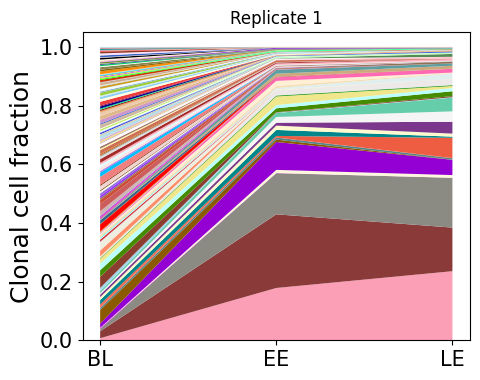

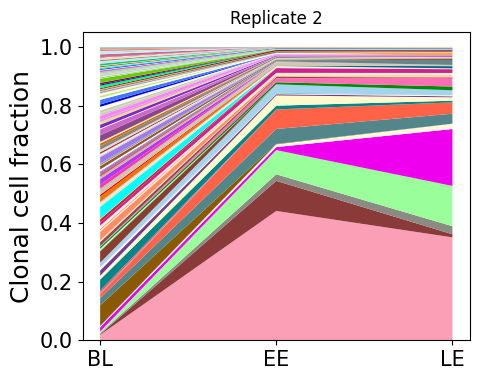

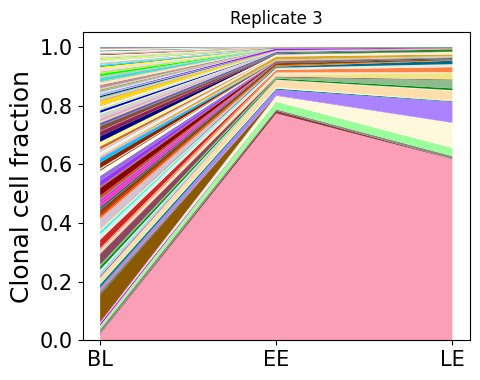

In [102]:
exp = ['a3028','a3026','a3030']
i = 0
for lineage in lineages: 
    clone_counts_sub = clone_counts[clone_counts.merged_rep.isin(list(lineage))]
    clone_counts_sub = clone_counts_sub.groupby(['Time.point','lineageGrp'])['count'].sum().reset_index()
    clone_counts_sub = clone_counts_sub.pivot(index='lineageGrp',columns='Time.point',values='count')
    clone_counts_sub = clone_counts_sub.fillna(0)
    time_points = ['T1', 'T2', 'T3']
    normalized_data = clone_counts_sub/clone_counts_sub.sum(axis=0)
    normalized_data = normalized_data.loc[cell_lineage['lineageGrp'].value_counts().index[cell_lineage['lineageGrp'].value_counts().index.isin(normalized_data.index)],:]
    fig, ax = plt.subplots(figsize=(5,4))
    plt.rcParams['pdf.fonttype'] = 42
    plt.gcf().set_size_inches(5, 4) 
    ax.stackplot(time_points, normalized_data, colors=[color_dict[str(lin)] for lin in normalized_data.index.unique().to_list()],linewidth=0)
    ax.set_xlabel('Time point',fontsize=18)
    ax.set_ylabel('Clone frequency',fontsize=18)
    ax.tick_params(axis='y',labelsize=15)
    ax.tick_params(axis='x',labelsize=15)
    ax.set_title(exp[i])
    plt.xticks(['T1','T2','T3'],['BL','EE','LE'])
    plt.xlabel('')
    plt.ylabel('Clonal cell fraction')
    plt.title('Replicate '+str(i+1))
    plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2/clone_dynamics_'+ exp[i]+'.pdf', dpi=500, bbox_inches='tight')
    plt.show()
    i = i + 1


In [65]:
clone_counts_sub

Time.point,T1,T2,T3
lineageGrp,,,
1,117.0,6930.0,6281.0
10,51.0,1.0,0.0
100,22.0,27.0,2.0
101,61.0,0.0,0.0
103,1.0,0.0,0.0
...,...,...,...
93,47.0,0.0,0.0
94,106.0,0.0,0.0
95,1.0,0.0,1.0


In [8]:
color_lineage = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/color_lineage_dict.csv')
color_lineage.columns = ['lineageGrp','color']
color_lineage['lineageGrp'] = ['C'+str(lineageGrp) for lineageGrp in color_lineage['lineageGrp']]
color_lineage['lineageGrp'] = new_lineageGrp.loc[color_lineage['lineageGrp'],'new_lineageGrp'].to_list()
color_lineage.loc[color_lineage['lineageGrp']=='C1','color'] = '#fa9fb5'
color_lineage

,lineageGrp,color
0,C1,#fa9fb5
1,C5,#EE00EE
2,C2,#8B3A3A
3,C3,#8B8B83
4,C6,#FFF8DC
...,...,...
170,C172,#EED8AE
171,C167,#FF4040
172,C175,#B0E0E6
173,C165,#008B45


In [ ]:
color_lineage.to_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/color_lineage_dict.new.csv',index=False)

# EE vsLE clone frequency 

In [1]:
import math
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a3026_clone_frequency = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/clone_frequency/a3026_FoldChange.csv',sep=',')
a3026_clone_frequency['T2'] = -np.log10(a3026_clone_frequency['T2'])
a3026_clone_frequency['T3'] = -np.log10(a3026_clone_frequency['T3'])
a3026_clone_frequency['mouse'] = 'a3026'
a3026_clone_frequency

/home/liangzhen/anaconda3/envs/cassiopeia2/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,lineageGrp,T1,T2,T3,mouse
0,1,0.018329,0.355706,0.454981,a3026
1,2,0.002122,0.988737,1.971372,a3026
2,3,0.003280,1.653588,1.562586,a3026
3,4,0.004245,2.028047,1.743574,a3026
4,5,0.014277,1.984581,0.712234,a3026
...,...,...,...,...,...
160,172,0.001544,inf,inf,a3026
161,173,0.001544,inf,inf,a3026
162,174,0.001736,inf,inf,a3026
163,175,0.000965,inf,inf,a3026


In [3]:
a3028_clone_frequency = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/clone_frequency/a3028_FoldChange.csv',sep=',')
a3028_clone_frequency['T2'] = -np.log10(a3028_clone_frequency['T2'])
a3028_clone_frequency['T3'] = -np.log10(a3028_clone_frequency['T3'])
a3028_clone_frequency['mouse'] = 'a3028'
a3028_clone_frequency

/home/liangzhen/anaconda3/envs/cassiopeia2/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,lineageGrp,T1,T2,T3,mouse
0,1,0.007047,0.748934,0.627943,a3028
1,2,0.023658,0.600057,0.827978,a3028
2,3,0.008221,0.853143,0.769912,a3028
3,4,0.001342,1.970783,2.035038,a3028
4,5,0.002181,3.277208,inf,a3028
...,...,...,...,...,...
154,171,0.005705,3.277208,3.521705,a3028
155,173,0.003188,inf,inf,a3028
156,174,0.009060,2.879268,3.697796,a3028
157,175,0.005705,inf,inf,a3028


In [4]:
a3030_clone_frequency = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/clone_frequency/a3030_FoldChange.csv',sep=',')
a3030_clone_frequency['T2'] = -np.log10(a3030_clone_frequency['T2'])
a3030_clone_frequency['T3'] = -np.log10(a3030_clone_frequency['T3'])
a3030_clone_frequency['mouse'] = 'a3030'
a3030_clone_frequency

/home/liangzhen/anaconda3/envs/cassiopeia2/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,lineageGrp,T1,T2,T3,mouse
0,1,0.020221,0.111575,0.209548,a3030
1,2,0.002420,2.043823,2.928396,a3030
2,3,0.014691,2.318840,2.034449,a3030
3,4,0.003284,1.682795,1.066563,a3030
4,5,0.007777,3.651278,inf,a3030
...,...,...,...,...,...
148,171,0.000518,inf,inf,a3030
149,172,0.006568,inf,inf,a3030
150,173,0.005358,inf,inf,a3030
151,175,0.002074,inf,inf,a3030


In [5]:
clone_frequency = pd.concat([a3026_clone_frequency,a3028_clone_frequency,a3030_clone_frequency],axis=0)
clone_frequency

,lineageGrp,T1,T2,T3,mouse
0,1,0.018329,0.355706,0.454981,a3026
1,2,0.002122,0.988737,1.971372,a3026
2,3,0.003280,1.653588,1.562586,a3026
3,4,0.004245,2.028047,1.743574,a3026
4,5,0.014277,1.984581,0.712234,a3026
...,...,...,...,...,...
148,171,0.000518,inf,inf,a3030
149,172,0.006568,inf,inf,a3030
150,173,0.005358,inf,inf,a3030
151,175,0.002074,inf,inf,a3030


<Figure size 400x400 with 0 Axes>

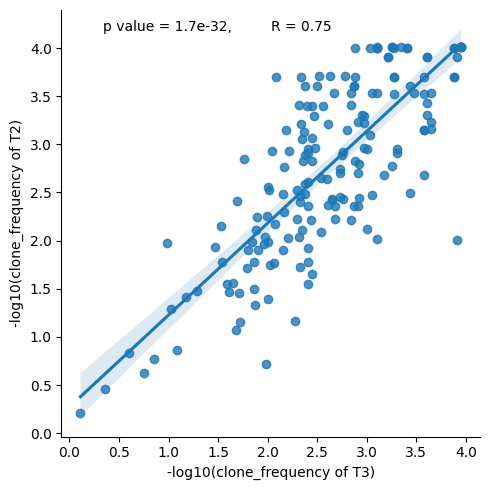

In [7]:
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(4, 4)
clone_frequency = clone_frequency[~np.array([math.isinf(x) for x in clone_frequency['T2']]) & ~np.array([math.isinf(x) for x in clone_frequency['T3']])]
slope, intercept, r_value, p_value, std_err = stats.linregress(clone_frequency['T2'], clone_frequency['T3'])
r_squared, p_value = stats.spearmanr(clone_frequency['T2'], clone_frequency['T3'])
equation = f'p value = {p_value:.1e}, '
r_value = f'R = {r_squared:.2f}'

sns.lmplot(data=clone_frequency,x='T2',y='T3',lowess=False,ci=95,robust=True)
plt.text(0.1, 0.95, equation, transform=plt.gca().transAxes, fontsize=10)
plt.text(0.5, 0.95, r_value, transform=plt.gca().transAxes, fontsize=10) 

plt.ylabel('-log10(clone_frequency of T2)')
plt.xlabel('-log10(clone_frequency of T3)')
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/T2_cloneFreq_vs_T3_cloneFreq.pdf')
plt.show()

# BL vs EE clone frequency

<Figure size 400x400 with 0 Axes>

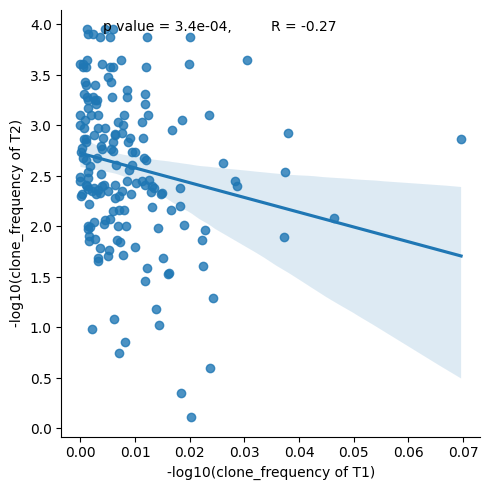

In [8]:
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(4, 4)
clone_frequency = clone_frequency[~np.array([math.isinf(x) for x in clone_frequency['T2']]) & ~np.array([math.isinf(x) for x in clone_frequency['T1']])]
slope, intercept, r_value, p_value, std_err = stats.linregress(clone_frequency['T2'], clone_frequency['T1'])
r_squared, p_value = stats.spearmanr(clone_frequency['T2'], clone_frequency['T1'])
p_value = f'p value = {p_value:.1e}, '
r_value = f'R = {r_squared:.2f}'

sns.lmplot(data=clone_frequency,x='T1',y='T2',lowess=False,ci=95,robust=True)
plt.text(0.1, 0.95, p_value, transform=plt.gca().transAxes, fontsize=10)
plt.text(0.5, 0.95, r_value, transform=plt.gca().transAxes, fontsize=10) 

plt.ylabel('-log10(clone_frequency of T2)')
plt.xlabel('-log10(clone_frequency of T1)')
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/T2_cloneFreq_vs_T1_cloneFreq.pdf')
plt.show()